In [8]:

from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
 
 
class Clustering():
    def __init__(self, k_num_center=2, outlier = True, method='Mean'):
        self.k_num_center = k_num_center
        self.method = method
        if outlier:
            self.data = np.array([[1,2],[3,2],[2,1],[7,8],[8,6],[7,8],[30,30]])
            target = np.array([1,2,3,4,5,6,7])
        else:
            self.data = np.array([[1,2],[3,2],[2,1],[7,8],[8,6],[7,8]])
            target = np.array([1,2,3,4,5,6])
        pyplot.scatter(self.data[:, 0], self.data[:, 1], c=target)
        pyplot.show()
        
    def ou_distance(self, x, y):
        return np.sqrt(sum(np.square(x - y)))
    
    def run_k_means(self, func_of_dis):
        indexs = list(range(len(self.data)))
        random.shuffle(indexs)
        init_centroids_index = indexs[:self.k_num_center]
        centroids = self.data[init_centroids_index,:]
        levels = list(range(self.k_num_center))  
        print('start iteration')
        sample_target=[]
        for i in range(10):

            new_centroids=[[] for i in range(self.k_num_center)]
            new_centroids_num=[0 for i in range(self.k_num_center)]
            sample_target=[]

            for sample in self.data:
                #calculate distance
                distances = [self.ou_distance(sample,centroid) for centroid in centroids]
                cur_level = np.argmin(distances)  
                sample_target.append(cur_level)

                
                new_centroids_num[cur_level]+=1
                if len(new_centroids[cur_level]) < 1:
                    new_centroids[cur_level] = sample
                else:
                    new_centroids[cur_level] = new_centroids[cur_level]+sample

            centroids = list()
            for centroid, num in zip(new_centroids,new_centroids_num):
                centroids.append([item/num for item in centroid])
            centroids = np.array(centroids)

        print('end')
        return sample_target 


 
    def run_k_center(self, func_of_dis):
        print('randomly create', self.k_num_center, 'centers')
        indexs = list(range(len(self.data)))
        random.shuffle(indexs)  
        init_centroids_index = indexs[:self.k_num_center]
        centroids = self.data[init_centroids_index, :]   
        levels = list(range(self.k_num_center))
        print('start iteration')
        sample_target = []
        if_stop = False
        while(not if_stop):
            if_stop = True
            classify_points = [[centroid] for centroid in centroids]
            sample_target = []
            for sample in self.data:
                distances = [func_of_dis(sample, centroid) for centroid in centroids]
                cur_level = np.argmin(distances)
                sample_target.append(cur_level)
                classify_points[cur_level].append(sample)
            for i in range(self.k_num_center):  
                distances = [func_of_dis(point_1, centroids[i]) for point_1 in classify_points[i]]
                now_distances = sum(distances)   
                for point in classify_points[i]:
                    distances = [func_of_dis(point_1, point) for point_1 in classify_points[i]]
                    new_distance = sum(distances)
                    if new_distance < now_distances:
                        now_distances = new_distance
                        centroids[i] = point    
                        if_stop = False
        print('end')
        return sample_target
 
    def run(self):
        if self.method == 'Mean':
            predict = self.run_k_means(self.ou_distance)
        else:
            predict = self.run_k_center(self.ou_distance)
        pyplot.scatter(self.data[:, 0], self.data[:, 1], c=predict)


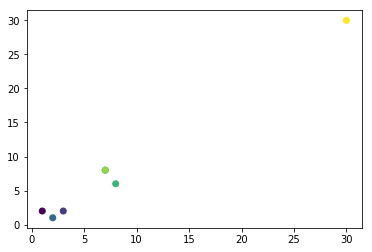

randomly create 2 centers
start iteration
end


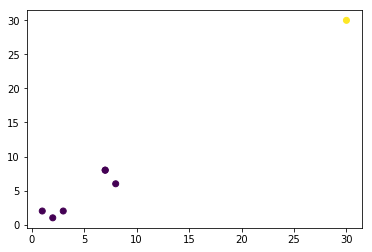

In [2]:
test_one = Clustering(outlier=True, k_num_center=2, method='medoid')
test_one.run()

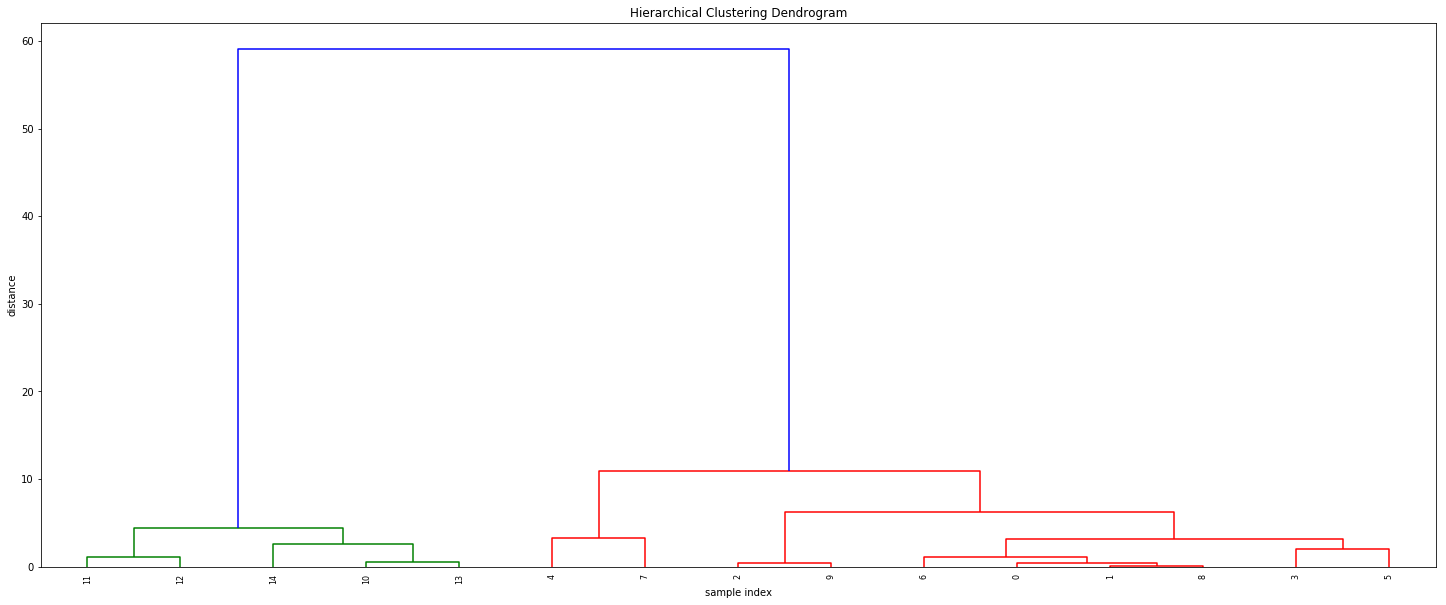

In [3]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[10,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[5,])
X = np.concatenate((a, b),)
Z = linkage(X, 'ward')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

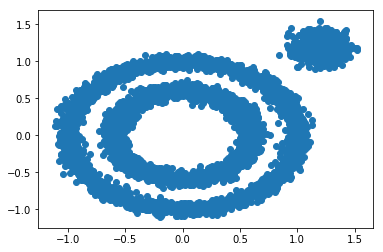

In [4]:
from sklearn import datasets
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,
                                      noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],
               random_state=9)

X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

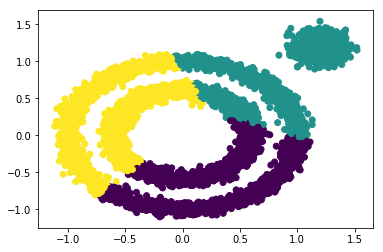

In [5]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

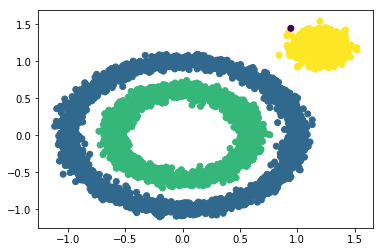

In [6]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()